### 使用Tensflow实现梯度下降

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x_data = np.linspace(-10., 10., 1000, endpoint = False)
y_data = 3. * x_data + 4. + np.random.normal(size=len(x_data))

# 打乱顺序
x_indexs = np.random.permutation(len(x_data))
x_data = x_data[x_indexs]
y_data = y_data[x_indexs]

LR = 0.01 #学习率 
n_iters = 1000 #训练次数

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


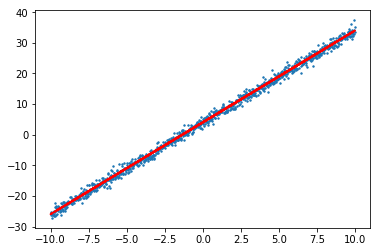

Predicted model: [3.0018747]x + [4.0551367]
CPU times: user 1.02 s, sys: 127 ms, total: 1.14 s
Wall time: 668 ms


In [3]:
%%time

# x 和 y 是我们的训练数据的占位符
x = tf.placeholder("float")
y = tf.placeholder("float")

# w 是存储我们的值的变量。 它使用“猜测”来初始化
w = tf.Variable([0.], name="w")
b = tf.Variable([0.],name="b")

# 我们的模型是 y = w * x + b
y_model = w * x + b

# 我们的误差定义为均方误差
loss = tf.reduce_mean(tf.square(y - y_model))

# GradientDescentOptimizer 完成繁重的工作
optimizer = tf.train.GradientDescentOptimizer(LR)
train_op = optimizer.minimize(loss)

with tf.Session() as session:
    # TensorFlow 常规 - 初始化值，创建会话并运行模型
    tf.global_variables_initializer().run()
    
    for i in range(n_iters):
        x_value = x_data
        y_value = y_data
#         x_value = x_data[i]
#         y_value = y_data[i]
        train_,w_,b_,loss_ = session.run([train_op,w,b,loss], feed_dict={x: x_value, y: y_value})
#         print("step:{i},loss:{loss_},w:{w_},b:{b_}".format(**locals()))  #训练过程
    
    plt.scatter(x_data,y_data,s=2)
    plt.plot(x_data, w_ * x_data + b_, color='red', linewidth=2.0, linestyle='--')
    plt.show()
    
    print("Predicted model: {a}x + {b}".format(a=w_, b=b_))

### 多元梯度下降

In [6]:
m=1000
n=10
np.random.seed(666)
X_data = np.random.random(size=(m,n))
true_W = np.arange(1,n+1,dtype=float).reshape(-1,1)
true_b = 6.
y_data = X_data.dot(true_W) + true_b + np.random.normal(size=len(X_data))

LR = 0.01 #学习率 
n_iters = 1000 #训练次数

In [7]:
%%time

# x 和 y 是我们的训练数据的占位符
X = tf.placeholder("float")
y = tf.placeholder("float")

# w 是存储我们的值的变量。 它使用“猜测”来初始化 ,这里注意shape是(n,1) 而不是 (n,) 因为tf的matmul 参数不能是
W = tf.Variable(tf.zeros([n,1],dtype=tf.float32), name="w")
b = tf.Variable(tf.zeros(1,dtype=tf.float32),name="b")

# 我们的模型是 y = w * x + b
y_model = tf.matmul(X,W) + b

# 我们的误差定义为均方误差
loss = tf.reduce_mean(tf.square(y - y_model))

# GradientDescentOptimizer 完成繁重的工作
optimizer = tf.train.GradientDescentOptimizer(LR)
train_op = optimizer.minimize(loss)

with tf.Session() as session:
    # TensorFlow 常规 - 初始化值，创建会话并运行模型
    tf.global_variables_initializer().run()
    
    for i in range(n_iters):
#         x_value = X_data
#         y_value = y_data
        x_value = X_data[i].reshape(1,-1)
        y_value = y_data[i]
        train_,w_,b_,loss_ = session.run([train_op,W,b,loss], feed_dict={X: x_value, y: y_value})
#       print("step:{i},loss:{loss_},w:{w_},b:{b_}".format(**locals()))    #训练过程
        
    print("Predicted model: {a}x + {b}".format(a=w_, b=b_))

Predicted model: [[1.5000343]
 [2.1404192]
 [2.8589902]
 [3.9957354]
 [4.817198 ]
 [5.539033 ]
 [6.265564 ]
 [7.065933 ]
 [8.064317 ]
 [8.559007 ]]x + [8.1715145]
CPU times: user 639 ms, sys: 81.2 ms, total: 720 ms
Wall time: 519 ms
